PRIMERO SE CARGARÁ EL DATASET, ESTE LO DEBEREMOS TENER YA DESCARGADO EN LA MISMA CARPETA DE NUESTRO CÓDIGO, importamos librerías:

In [3]:
import gc
import pandas as pd
from os import getcwd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import accuracy_score
pd.set_option("display.max_columns", 80)


Para poder cargar el conjunto de datos debemos conocer el "path" de donde instalamos nuestro dataset, importarlo y cargarlo:

In [4]:
pwd

'C:\\Users\\DOCENTE\\Desktop\\TESIS\\IDS-with-ML'

In [5]:
import os 
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'GeneratedLabelledFlows',
 'IDS_with_ML.ipynb',
 'MachineLearningCSV']

In [11]:
import os
for dirname, _, filenames in os.walk('C:\\Users\\DOCENTE\\Desktop\\TESIS\\IDS-with-ML\\MachineLearningCSV'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Friday-WorkingHours-Morning.pcap_ISCX.csv
C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Monday-WorkingHours.pcap_ISCX.csv
C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Tuesday-WorkingHours.pcap_ISCX.csv
C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Wednesday-workingHours.p

Al cargar nuestro dataset, deberemos conocer la cantidad de datos a visualizar y de que se trata, por lo que primero, se decidirá unir el conjunto de datos de los diferentes días y después se procederá a depurarlos:

In [14]:
Filenames=[]
for x in os.listdir('C:\\Users\\DOCENTE\\Desktop\\TESIS\\IDS-with-ML\\MachineLearningCSV'):
    Filenames.append(x)

In [15]:
import os
Filenames=[]
for dirname, _, filenames in os.walk('C:\\Users\\DOCENTE\\Desktop\\TESIS\\IDS-with-ML\\MachineLearningCSV'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        Filenames.append(os.path.join(dirname, filename))

C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Friday-WorkingHours-Morning.pcap_ISCX.csv
C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Monday-WorkingHours.pcap_ISCX.csv
C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Tuesday-WorkingHours.pcap_ISCX.csv
C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Wednesday-workingHours.p

In [16]:
Filenames

['C:\\Users\\DOCENTE\\Desktop\\TESIS\\IDS-with-ML\\MachineLearningCSV\\MachineLearningCVE\\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
 'C:\\Users\\DOCENTE\\Desktop\\TESIS\\IDS-with-ML\\MachineLearningCSV\\MachineLearningCVE\\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
 'C:\\Users\\DOCENTE\\Desktop\\TESIS\\IDS-with-ML\\MachineLearningCSV\\MachineLearningCVE\\Friday-WorkingHours-Morning.pcap_ISCX.csv',
 'C:\\Users\\DOCENTE\\Desktop\\TESIS\\IDS-with-ML\\MachineLearningCSV\\MachineLearningCVE\\Monday-WorkingHours.pcap_ISCX.csv',
 'C:\\Users\\DOCENTE\\Desktop\\TESIS\\IDS-with-ML\\MachineLearningCSV\\MachineLearningCVE\\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
 'C:\\Users\\DOCENTE\\Desktop\\TESIS\\IDS-with-ML\\MachineLearningCSV\\MachineLearningCVE\\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
 'C:\\Users\\DOCENTE\\Desktop\\TESIS\\IDS-with-ML\\MachineLearningCSV\\MachineLearningCVE\\Tuesday-WorkingHours.pcap_ISCX.csv',
 'C:\\Users\\DOCENTE\

In [17]:
dataframes=[]
for i in range(len(Filenames)):
    print ('df'+str(i))
    dataframes.append('df'+str(i))

df0
df1
df2
df3
df4
df5
df6
df7


In [18]:
dataframes

['df0', 'df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7']

In [19]:
for i in range(len(Filenames)):
    print (Filenames[i])
    #dataframes[i]=pd.read_csv(Filenames[i])

C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Friday-WorkingHours-Morning.pcap_ISCX.csv
C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Monday-WorkingHours.pcap_ISCX.csv
C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Tuesday-WorkingHours.pcap_ISCX.csv
C:\Users\DOCENTE\Desktop\TESIS\IDS-with-ML\MachineLearningCSV\MachineLearningCVE\Wednesday-workingHours.p

In [33]:
import codecs

In [34]:
def _to_utf8(filename: str, encoding="latin1", blocksize=1048576):
    tmpfilename = filename + ".tmp"
    with codecs.open(filename, "r", encoding) as source:
        with codecs.open(tmpfilename, "w", "utf-8") as target:
            while True:
                contents = source.read(blocksize)
                if not contents:
                    break
                target.write(contents)

    # replace the original file
    os.rename(tmpfilename, filename)

In [44]:
df1=pd.read_csv(Filenames[0])
df2=pd.read_csv(Filenames[1])
df3=pd.read_csv(Filenames[2])
df4=pd.read_csv(Filenames[3])
df5=pd.read_csv(Filenames[4])
df6=pd.read_csv(Filenames[5])
df7=pd.read_csv(Filenames[6])
df8=pd.read_csv(Filenames[7])

In [58]:
df1.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [59]:
print(df1.shape, df2.shape, df3.shape, df4.shape, df5.shape, df6.shape, df7.shape, df8.shape)

(225745, 79) (286467, 79) (191033, 79) (529918, 79) (288602, 79) (170366, 79) (445909, 79) (692703, 79)


In [60]:
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])

In [64]:
df.shape
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.000000,3,3,3,3.00000,0.00000,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.000000,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,1.100917e+05,18348.623850,109.0,0.000000,109,109,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,2.307692e+05,38461.538460,52.0,0.000000,52,52,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,3.529412e+05,58823.529410,34.0,0.000000,34,34,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.000000,3,3,3,3.00000,0.00000,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.000000,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.0,0.00000,76,76,76.0,0.0,8.194940e+03,186.248642,6443.0,13617.579480,30780,3,30832,10277.33333,17755.84381,30780,4,3,3.0,0.0,3,3,0,0,0,0,80,64,124.165761,62.082881,28,76,41.714286,23.421602,548.571429,0,0,0,0,0,0,0,0,0,48.666667,28.0,76.0,80,0,0,0,0,0,0,4,112,2,152,-1,-1,3,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.0,0.00000,181,181,181.0,0.0,1.376543e+06,12345.679010,108.0,183.597386,320,2,2,2.00000,0.00000,2,2,2,2.0,0.0,2,2,0,0,0,0,40,40,6172.839506,6172.839506,42,181,97.600000,76.133435,5796.300000,0,0,0,0,0,0,0,0,1,122.000000,42.0,181.0,40,0,0,0,0,0,0,2,84,2,362,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.5,21.92031,6,6,6.0,0.0,4.512195e+05,36585.365850,41.0,52.325902,78,4,4,4.00000,0.00000,4,4,0,0.0,0.0,0,0,1,0,0,0,64,20,24390.243900,12195.121950,0,31,17.000000,16.3

En los anteriores pasos, se ha combinado el conjunto de todos los datos, lo que haremos a continuación será depurar los registros duplicados y eliminar datos nulos:

In [65]:
Duplicated_Row = df[df.duplicated()]
Duplicated_Row

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2109,80,77,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.558442e+05,2.597403e+04,77.000000,0.000000,77,77,77,77.0,0.0,77,77,0,0.0,0.0,0,0,0,0,0,0,40,0,2.597403e+04,0.000000,6,6,6.0,0.000000,0.0,0,0,0,0,1,0,0,0,0,9.00,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,256,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2257,443,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,6.666667e+05,3.000000,0.000000,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,6.666667e+05,0.000000,6,6,6.0,0.000000,0.0,1,0,0,0,0,0,0,0,0,9.00,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,0,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2749,443,49,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,2.448980e+05,4.081633e+04,49.000000,0.000000,49,49,49,49.0,0.0,49,49,0,0.0,0.0,0,0,0,0,0,0,40,0,4.081633e+04,0.000000,6,6,6.0,0.000000,0.0,1,0,0,0,0,0,0,0,0,9.00,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,0,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2862,443,4,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,3.000000e+06,5.000000e+05,4.000000,0.000000,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,0,0,0,0,40,0,5.000000e+05,0.000000,6,6,6.0,0.000000,0.0,1,0,0,0,0,0,0,0,0,9.00,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,0,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2877,443,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.000000,0.000000,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.0,0.000000,0.0,1,0,0,0,0,0,0,0,0,9.00,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,0,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692661,53,179,2,2,46,46,23,23,23.0,0.0,23,23,23.0,0.0,5.139665e+05,2.234637e+04,59.666667,101.613647,177,1,1,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0,0,0,64,64,1.117318e+04,11173.184360,23,23,23.0,0.000000,0.0,0,0,0,0,0,0,0,0,1,28.75,23.0,23.0,64,0,0,0,0,0,0,2,46,2,46,-1,-1,1,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692685,53,161,2,2,82,114,41,41,41.0,0.0,57,57,57.0,0.0,1.217391e+06,2.484472e+04,53.666667,86.892654,154,3,3,3.0,0.0,3,3,4,4.0,0.0,4,4,0,0,0,0,64,64,1.242236e+04,12422.360250,41,57,47.4,8.763561,76.8,0,0,0,0,0,0,0,0,1,59.25,41.0,57.0,64,0,0,0,0,0,0,2,82,2,114,-1,-1,1,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692686,53,212,2,2,84,162,42,42,42.0,0.0,81,81,81.0,0.0,1.160377e+06,1.886792e+04,70.666667,38.397048,115,48,49,49.0,0.0,49,49,48,48.0,0.0,48,48,0,0,0,0,64,64,9.433962e+03,9433.962264,42,81,57.6,21.361180,456.3,0,0,0,0,0,0,0,0,1,72.00,42.0,81.0,64,0,0,0,0,0,0,2,84,2,162,-1,-1,1,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692691,443,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,6.666667e+05,3.0000

La tabla anterior muestra la cantidad de registros duplicados que existen, por lo que a continuación se procede a eliminar estos datos:

In [66]:
df.drop_duplicates()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.000000,3,3,3,3.00000,0.00000,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.000000,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,1.100917e+05,18348.623850,109.0,0.000000,109,109,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,2.307692e+05,38461.538460,52.0,0.000000,52,52,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.00000,6,6,6.0,0.0,3.529412e+05,58823.529410,34.0,0.000000,34,34,0,0.00000,0.00000,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1,9.000000,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.00000,0,0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.000000,3,3,3,3.00000,0.00000,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,9.000000,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692698,53,32215,4,2,112,152,28,28,28.0,0.00000,76,76,76.0,0.0,8.194940e+03,186.248642,6443.0,13617.579480,30780,3,30832,10277.33333,17755.84381,30780,4,3,3.0,0.0,3,3,0,0,0,0,80,64,124.165761,62.082881,28,76,41.714286,23.421602,548.571429,0,0,0,0,0,0,0,0,0,48.666667,28.0,76.0,80,0,0,0,0,0,0,4,112,2,152,-1,-1,3,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692699,53,324,2,2,84,362,42,42,42.0,0.00000,181,181,181.0,0.0,1.376543e+06,12345.679010,108.0,183.597386,320,2,2,2.00000,0.00000,2,2,2,2.0,0.0,2,2,0,0,0,0,40,40,6172.839506,6172.839506,42,181,97.600000,76.133435,5796.300000,0,0,0,0,0,0,0,0,1,122.000000,42.0,181.0,40,0,0,0,0,0,0,2,84,2,362,-1,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
692700,58030,82,2,1,31,6,31,0,15.5,21.92031,6,6,6.0,0.0,4.512195e+05,36585.365850,41.0,52.325902,78,4,4,4.00000,0.00000,4,4,0,0.0,0.0,0,0,1,0,0,0,64,20,24390.243900,12195.121950,0,31,17.000000,16.3

Entonces vemos que de 2830743 rows × 79 columns pasó a 2522362 rows × 79 columns, pero esto únicamente hacemos para analizar los datos de variables del tipo booleano, cuantitativo o categórico, por lo que ahora debemos remplazar los valores nullos:

In [68]:
df.nunique() #Esto lo hacemos para ver los valores únicos de cada atributo.

 Destination Port                53805
 Flow Duration                 1050899
 Total Fwd Packets                1432
 Total Backward Packets           1747
Total Length of Fwd Packets      17928
                                ...   
Idle Mean                       222016
 Idle Std                       197616
 Idle Max                       149737
 Idle Min                       223888
 Label                              15
Length: 79, dtype: int64

In [69]:
#datos nulos
df.isna().sum()
np.nan_to_num(df)
df.replace("Infinity", 0, inplace=True)

In [72]:
df.groupby(" Label").first()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BENIGN,54865,3,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,4.000000e+06,666666.666700,3.000000e+00,0.000000e+00,3,3,3,3.000000e+00,0.000000e+00,3,3,0,0.000000e+00,0.000000e+00,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,0,0,0,0,9.000000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.00000,0,0,0.0,0.00000,0,0
Bot,8080,60202640,9,9,322,256,322,0,35.777778,107.333333,256,0,28.444444,85.333333,9.600908e+00,0.298990,3.541332e+06,4.901981e+06,10200000,47,51200000,6.396442e+06,5.268490e+06,10200000,234,60200000,7.518954e+06,4.645137e+06,10300000,637,0,0,0,0,296,296,0.149495,0.149495,0,322,30.421053,91.783753,8.424257e+03,0,0,0,1,0,0,0,0,1,32.111111,35.777778,28.444444,296,0,0,0,0,0,0,9,322,9,256,29200,110,1,32,63678.2,22252.53596,103175,50911,10200000.0,34941.27201,10200000,10100000
DDoS,80,1293792,3,7,26,11607,20,0,8.666667,10.263203,5840,0,1658.142857,2137.297080,8.991399e+03,7.729218,1.437547e+05,4.308658e+05,1292730,2,747,3.735000e+02,5.239661e+02,744,3,1293746,2.156243e+05,5.276719e+05,1292730,2,0,0,0,0,72,152,2.318765,5.410452,0,5840,1057.545455,1853.437529,3.435231e+06,0,0,0,1,0,0,0,0,2,1163.300000,8.666667,1658.142857,72,0,0,0,0,0,0,3,26,7,11607,8192,229,2,20,0.0,0.00000,0,0,0.0,0.00000,0,0
DoS GoldenEye,80,5008837,4,5,341,3525,341,0,85.250000,170.500000,2077,0,705.000000,990.644740,7.718359e+02,1.796824,6.261046e+05,1.768253e+06,5002306,47,6531,2.177000e+03,4.969145e+02,2615,1637,5008656,1.252164e+06,2.500883e+06,5003487,49,0,0,0,0,136,168,0.798589,0.998236,0,2077,386.600000,747.760984,5.591465e+05,0,0,0,1,0,0,0,0,1,429.555556,85.250000,705.000000,136,0,0,0,0,0,0,4,341,5,3525,29200,235,1,32,0.0,0.00000,0,0,0.0,0.00000,0,0
DoS Hulk,80,1878,3,6,382,11595,382,0,127.333333,220.547803,4355,0,1932.500000,2182.468304,6.377529e+06,4792.332268,2.347500e+02,2.291299e+02,577,15,975,4.875000e+02,2.651650e+02,675,300,1780,3.560000e+02,3.997881e+02,950,15,0,0,0,0,104,200,1597.444089,3194.888179,0,4355,1197.700000,1886.332364,3.558250e+06,0,0,0,1,0,0,0,0,2,1330.777778,127.333333,1932.500000,104,0,0,0,0,0,0,3,382,6,11595,29200,235,1,32,0.0,0.00000,0,0,0.0,0.00000,0,0
DoS Slowhttptest,80,16045,5,3,356,1964,356,0,71.200000,159.208040,1964,0,654.666667,1133.915929,1.445933e+05,498.597694,2.292143e+03,2.236413e+03,5415,73,16045,4.011250e+03,1.779768e+03,5415,1459,9788,4.894000e+03,9.461089e+02,5563,4225,0,0,0,0,168,104,311.623559,186.974135,0,1964,257.777778,650.575472,4.232484e+05,0,0,0,1,0,0,0,0,0,290.000000,71.200000,654.666667,168,0,0,0,0,0,0,5,356,3,1964,29200,235,1,32,0.0,0.00000,0,0,0.0,0.00000,0,0
DoS slowloris,80

Por lo que ahora, deberemos contar el número de ataques de cada paquete:

In [74]:
print(f'Dataset labels:')
display(df[' Label'].value_counts())
number_of_labels = len(df[' Label'].unique())
print(f'Number of labels: {number_of_labels}.')

Dataset labels:


 Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

Number of labels: 15.


Entonces realizamos una gráfica de pastel para realizar una comparación de todo el tráfico que está ingresando: 

In [86]:
attacks = df[df[' Label'] != 'BENIGN']
no_attacks = 0
for number in attacks[' Label'].value_counts():
    no_attacks += number
normal_traffic = df[' Label'].value_counts()['BENIGN']
attack_vs_normal = pd.Series({' Tráfico Normal' : normal_traffic, ' Ataque' : no_attacks})

In [80]:
print(f'Dataset labels:')
display(df[' Label'].value_counts())
number_of_labels = len(df[' Label'].unique())
print(f'Number of labels: {number_of_labels}.')

Dataset labels:


 Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

Number of labels: 15.


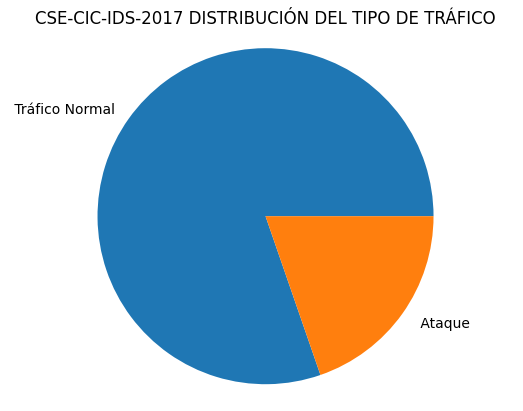

In [87]:
attack_vs_normal.plot(kind='pie')
plt.title('CSE-CIC-IDS-2017 DISTRIBUCIÓN DEL TIPO DE TRÁFICO')
plt.axis('equal')
plt.ylabel('')
plt.savefig('traffic_init_distr_pie.png')

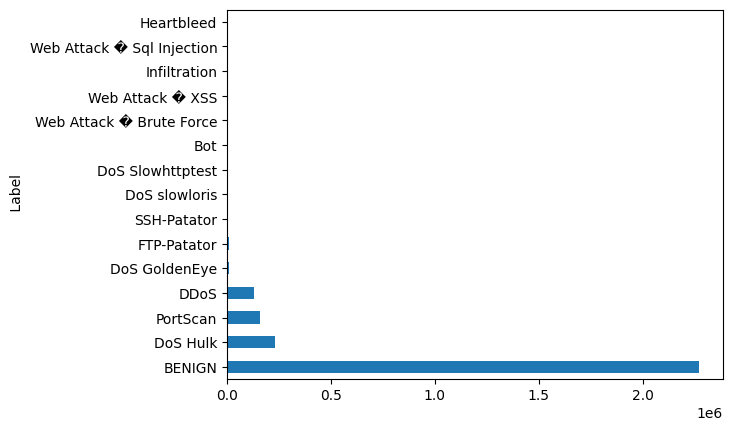

In [89]:
df[' Label'].value_counts().plot(kind='barh')
plt.savefig('traffic_init_distr_bar.png')

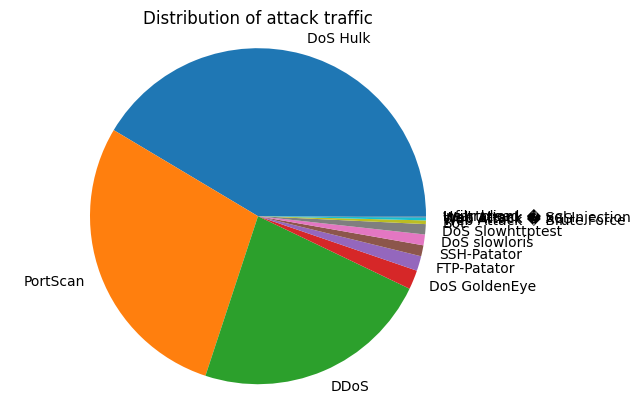

In [91]:
attacks[' Label'].value_counts().plot(kind='pie')
plt.axis('equal')
plt.ylabel('')
plt.title('Distribution of attack traffic')
plt.savefig('atack_init_distr_pie.png')

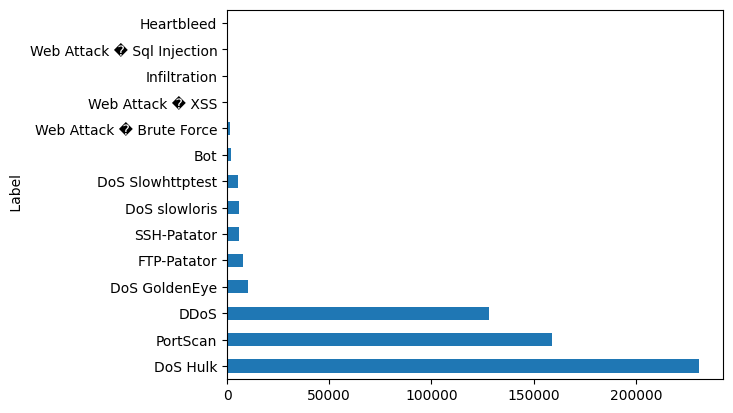

In [93]:
attacks[' Label'].value_counts().plot(kind='barh')
plt.savefig('attack_init_distr_bar.png')